In [1]:
import pandas as pd
import vertica_python
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import os
import scipy
from scipy.interpolate import UnivariateSpline
from scipy.stats import ttest_ind

In [2]:
username = os.getenv('VERTICA_USERNAME')
password = os.getenv('VERTICA_PASSWORD')
conn_info = {'host': 'warehouse.analytics.edx.org',
             'port': 5433,
             'user': username,
             'password': password,
             'database': 'warehouse',
             'read_timeout': 600,
             'unicode_error': 'strict',
             'ssl': False}

In [5]:
vtr_plot = pd.read_csv('../Documents/self_paced_vtr_plot.csv')

In [13]:
vtr_plot['vtr']=vtr_plot.num_verifs*100.0/vtr_plot.num_enrolls

In [15]:
sns.set_context("poster")
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
xkcd = sns.xkcd_palette(colors)

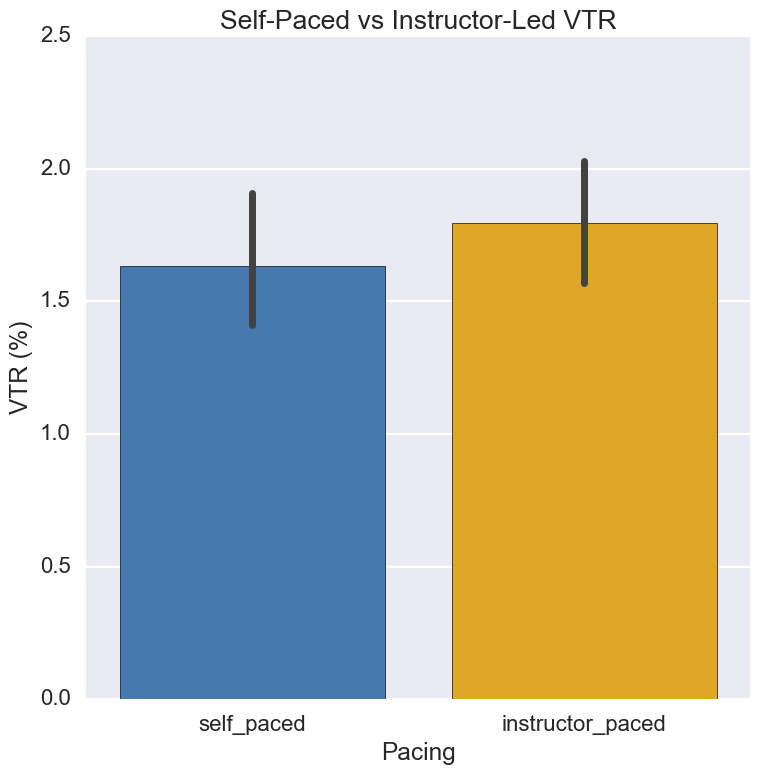

In [22]:
ax = sns.factorplot(data=vtr_plot, x='pacing_type', y = 'vtr', kind='bar', palette=xkcd, size = 8)
ax.set(title='Self-Paced vs Instructor-Led VTR',
      xlabel='Pacing',
      ylabel='VTR (%)')

In [23]:
dropoff_plot = pd.read_csv('../Documents/self_paced_instructor_led_dropoff_rate_plot.csv')


In [24]:
dropoff_plot

,course_id,pacing_type,num_enrolls,num_7d_active,num_21d_active,pct_7d_active,pct_21d_active,pct_dropoff
0,course-v1:IMFx+FPP.2x+2T2016,instructor_paced,5939,1847,1276.0,31.10,21.490000,30.91%
1,course-v1:MITx+CTL.SC3x+2T2016,instructor_paced,34243,5456,3661.0,15.93,10.690000,32.90%
2,course-v1:MITx+CTL.SC0x+3T2016,instructor_paced,40461,12558,7972.0,31.04,19.700000,36.52%
3,course-v1:MITx+CTL.SC1x_2+1T2016,instructor_paced,31178,11907,7440.0,38.19,23.860000,37.52%
4,course-v1:UTAustinX+UT.8.03x+1T2016,instructor_paced,10040,3549,2153.0,35.35,21.440000,39.34%
5,course-v1:CaltechX+CS_1156x+3T2016,instructor_paced,23150,4252,2542.0,18.37,10.980000,40.22%
6,course-v1:IDBx+IDB6.3x+3T2016,instructor_paced,7980,4343,2583.0,54.42,32.370000,40.52%
7,course-v1:UTAustinX+UT.7.20x+1T2016,instructor_paced,9151,1540,898.0,16.83,9.810000,41.69%
8,course-v1:MITx+CTL.SC2x_2+2T2016,instructor_paced,19880,6759,3937.0,34.00,19.800000,41.75%
9,course-v1:IMFx+MFx+3T2016,instructor_paced,17518,4920,2762.0,28.09,15.770000,43.86%


In [30]:
dropoff_plot['retention_rate']=100-(dropoff_plot.pct_7d_active - dropoff_plot.pct_21d_active) * 100.0/dropoff_plot.pct_7d_active

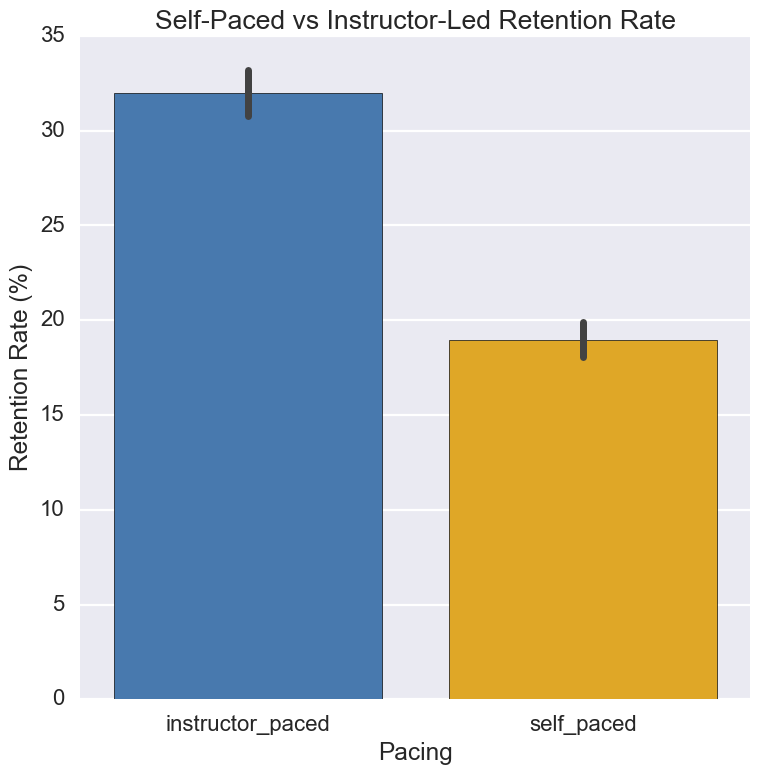

In [32]:
ax = sns.factorplot(data = dropoff_plot, x = 'pacing_type', y = 'retention_rate', kind='bar', palette=xkcd, size = 8)
ax.set(title='Self-Paced vs Instructor-Led Retention Rate',
      xlabel='Pacing',
      ylabel='Retention Rate (%)')

In [28]:
dropoff_plot.groupby('pacing_type').mean()

,num_enrolls,num_7d_active,num_21d_active,pct_7d_active,pct_21d_active,dropoff_rate
pacing_type,,,,,,
instructor_paced,16560.266839,4507.924870,1497.313472,25.926373,8.266108,68.005652
self_paced,21267.650485,5994.213592,1358.857724,26.537120,5.192851,81.037127
